In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import emcee
import corner

from astropy.table import Table
from astropy import units as u
from astroquery.sdss import SDSS
from astropy import coordinates as coords

/Users/Briana/anaconda2/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [8]:
andrews = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_flux_table.csv')
andrews_mb = andrews[np.isnan(andrews['logSFRlo'])]

print(andrews.columns)
print(len(andrews))

#print andrews.loc[:,['LogM*lo', 'LogM*up', 'logSFRlo', 'logSFRup', 'logM*', 'logSFR']]
print andrews['logSFRlo'].values

Index([u'Unnamed: 0', u'logM*lo', u'logM*up', u'logSFRlo', u'logSFRup',
       u'Ngal', u'logM*', u'logSFR', u'OII3727', u'e_OII3727', u'NeIII3868',
       u'e_NeIII3868', u'SII4069', u'e_SII4069', u'Hg', u'e_Hg', u'OIII4363',
       u'e_OIII4363', u'HeII4686', u'e_HeII4686', u'ArIV4740', u'e_ArIV4740',
       u'OIII4959', u'e_OIII4959', u'OIII5007', u'e_OIII5007', u'NII5755',
       u'e_NII5755', u'SIII6312', u'e_SIII6312', u'NII6548', u'e_NII6548',
       u'Ha', u'e_Ha', u'NII6583', u'e_NII6583', u'SII6716', u'e_SII6716',
       u'SII6731', u'e_SII6731', u'ArIII7135', u'e_ArIII7135', u'OII7320',
       u'e_OII7320', u'OII7330', u'e_OII7330'],
      dtype='object')
273
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  0.  -0.5  0.  -1.  -0.5  0.  -1.  -0.5 -1.  -1.5 -1.
 -0.5 -0.5  0.  -1.  -0.5  0.  -1.  -0

In [9]:
new_sdss = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_metallicty_measures_mass_bins_curti.csv')
print new_sdss.columns
print(len(new_sdss))
#make a column with the upper and lower metallicity errors averaged
new_sdss['metallicity_e'] = [np.round(np.average([float(new_sdss['met_err'].iloc[i].split(',')[0][1::]), float(new_sdss['met_err'].iloc[i].split(',')[1][0:-1])]), 3) for i in range(len(new_sdss))]
new_sdss_sub = new_sdss.loc[:,['logM*lo', 'logM*', 'Ngal', 'metallicity','metallicity_e']]
#print len(new_sdss)
#print new_sdss_sub

print(new_sdss['E(B-V)'])

Index([u'Unnamed: 0', u'logM*lo', u'logM*up', u'logM*', u'Ngal',
       u'metallicity', u'E(B-V)', u'OIII_intrinsic', u'met_err', u'E(B-V)_err',
       u'OIII_int_err'],
      dtype='object')
44
0     0.358047
1     0.143109
2     0.296653
3     0.539268
4     0.383088
5     0.349989
6     0.356583
7     0.360993
8     0.299366
9     0.232659
10    0.291951
11    0.260570
12    0.206233
13    0.179435
14    0.171708
15    0.171297
16    0.100448
17    0.072383
18    0.090510
19    0.088658
20    0.091007
21    0.100378
22    0.107786
23    0.096782
24    0.095799
25    0.094407
26    0.092903
27    0.114597
28    0.119539
29    0.125562
30    0.140598
31    0.162754
32    0.176988
33    0.189362
34    0.199065
35    0.208619
36    0.218357
37    0.215337
38    0.220100
39    0.212711
40    0.221054
41    0.259927
42    0.225020
43    0.254076
Name: E(B-V), dtype: float64


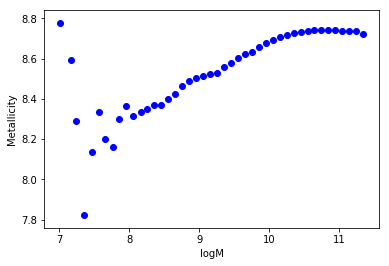

In [23]:
plt.scatter(x=new_sdss['logM*'], y=new_sdss['metallicity'], color='blue')
plt.xlabel('logM')
plt.ylabel('Metallicity')
plt.show()

(7.6, 9.2)

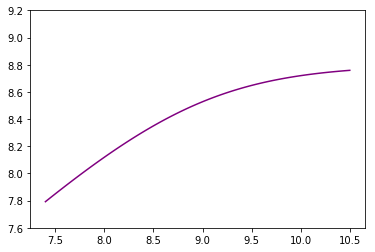

In [24]:
#The fit to MZR from andrews paper
M_to    = 8.901
met_asm = 8.798
gamma   = 0.640
M_star_paper = np.linspace(7.4, 10.5, 100)
met_paper = met_asm - np.log10(1 + (10**M_to/10**M_star_paper)**gamma )  

plt.plot(M_star_paper, met_paper, color='purple')
plt.ylim(7.6, 9.2)

In [25]:
#get MZR data from Andrews paper
and_met_hdr = pd.read_table('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_met_header.dat',delim_whitespace=True)
and_met = pd.read_fwf('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_met_table.dat', names = and_met_hdr['Label'])
and_met = and_met[np.isnan(and_met['logSFRlo'])]
and_met['logM*AVG'] = (and_met['logM*lo']+and_met['logM*up'])/2
and_met_sub = and_met.loc[:,['logM*lo','logM*AVG','logO/H','e_logO/H']]
print len(and_met)
#print and_met_sub

45


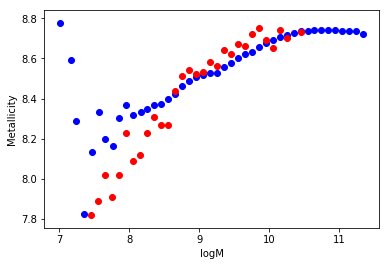

In [26]:
plt.scatter(x=new_sdss['logM*'], y=new_sdss['metallicity'], color='blue')
plt.scatter(x=and_met['logM*AVG'], y=and_met['logO/H'], color='red')
plt.xlabel('logM')
plt.ylabel('Metallicity')
plt.show()

In [27]:
met_merge = pd.merge(new_sdss_sub, and_met_sub, on='logM*lo', how='outer')
met_merge_drop = met_merge[~np.isnan(met_merge['logO/H'])]
#print met_merge_drop

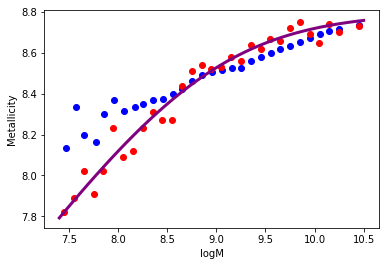

In [28]:
plt.scatter(x=met_merge_drop['logM*'], y=met_merge_drop['metallicity'], color='blue')
plt.scatter(x=met_merge_drop['logM*AVG'], y=met_merge_drop['logO/H'], color='red')
plt.plot(M_star_paper, met_paper, color='purple', linewidth=3)
plt.xlabel('logM')
plt.ylabel('Metallicity')
plt.show()

In [29]:
def mzr_model(M_star, theta):
    met_asm, M_to, gamma = theta
    met =  met_asm - np.log10(1 + (10**M_to/10**M_star)**gamma ) 
    return met

In [30]:
#define the log likelihood function
def lnlike(theta, M_star, met, met_err):
    mod_met = mzr_model(M_star, theta)
    return -0.5*sum(((met - mod_met)**2)/(met_err**2))

In [31]:
#define the log prior function
def lnprior(theta):
    met_asm, M_to, gamma = theta
    if ((0.0 <= met_asm <= 30.0) and (0.0 <= M_to <= 30.0) and (0.0 <= gamma <= 1.0)):
        return 0.0
    return -np.inf


In [32]:
#define log postierior to sovle with emcee
def lnprob(theta, M_star, met, met_err):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, M_star, met, met_err)

In [33]:
def run_emcee(ndim, nwalkers, nchains, thetaGuess, args):

    pos = [thetaGuess + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=args, a=1)

    print "Burning in ..."
    pos, prob, state = sampler.run_mcmc(pos, nchains[0])

    sampler.reset()

    print "Running MCMC ..."
    pos, prob, state = sampler.run_mcmc(pos, nchains[0], rstate0=state)

    flat_samples = sampler.flatchain
    samples = sampler.chain[:, :, :].reshape((-1, ndim))
    mc_results = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

    return samples, flat_samples, mc_results

In [34]:
thetaGuess = [8.798, 8.901, 0.640] #met_asm, M_to, gamma
ndim       = len(thetaGuess)
nwalkers   = 200
nchains    = (500, 2000) 
args_data  = (met_merge_drop['logM*'].values, met_merge_drop['metallicity'].values, met_merge_drop['metallicity_e'].values) #logM, met, met_err
args_paper = (met_merge_drop['logM*AVG'].values, met_merge_drop['logO/H'].values, met_merge_drop['e_logO/H'].values) #logM, met, met_err
samples_data, flat_samples_data, mc_results_data = run_emcee(ndim, nwalkers, nchains, thetaGuess, args_data)
samples_paper, flat_samples_paper, mc_results_paper = run_emcee(ndim, nwalkers, nchains, thetaGuess, args_paper)

Burning in ...
Running MCMC ...
Burning in ...
Running MCMC ...


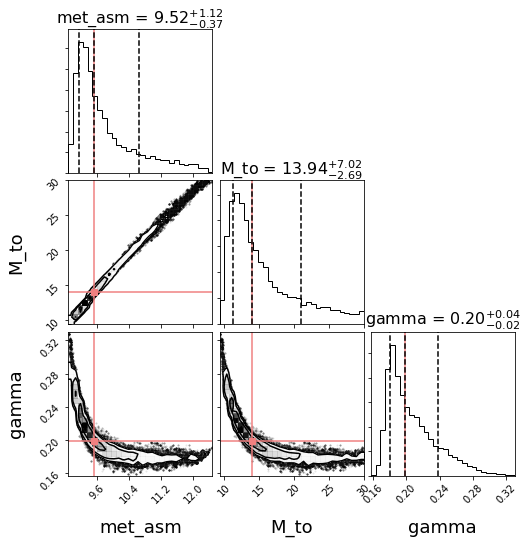

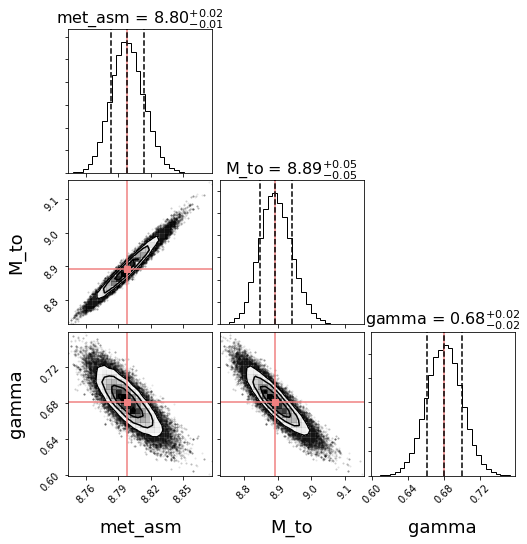

In [35]:
names = ['met_asm', 'M_to', 'gamma']
fig = corner.corner(samples_data, labels=names,
                    truths=[r[0] for r in mc_results_data], truth_color='lightcoral',
                    label_kwargs={"fontsize": 18}, show_titles=True,
                    title_kwargs={"fontsize": 16},
                    quantiles=[0.16, 0.5, 0.84], bins=30)

plt.show()

fig = corner.corner(samples_paper, labels=names,
                    truths=[r[0] for r in mc_results_paper], truth_color='lightcoral',
                    label_kwargs={"fontsize": 18}, show_titles=True,
                    title_kwargs={"fontsize": 16},
                    quantiles=[0.16, 0.5, 0.84], bins=30)

plt.show()

DATA: [9.522982353045322, 13.938539348191462, 0.1988012749693768]
met_asm 9.522982353045322 8.798139588507155 8.798
M_to 13.938539348191462 8.893321770477822 8.901
gamma 0.1988012749693768 0.6808001205035581 0.64


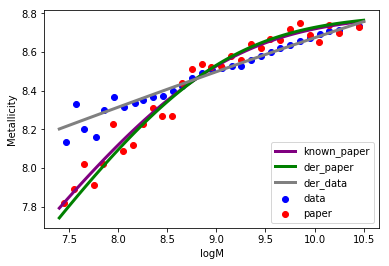

In [36]:
theta_truths_data = [r[0] for r in mc_results_data]
theta_truths_paper = [r[0] for r in mc_results_paper]
print "DATA:", theta_truths_data
print 'met_asm', theta_truths_data[0], theta_truths_paper[0], thetaGuess[0]
print 'M_to', theta_truths_data[1], theta_truths_paper[1], thetaGuess[1]
print 'gamma', theta_truths_data[2], theta_truths_paper[2], thetaGuess[2]

M_star = np.linspace(7.4, 10.5, 100)
met_vals_data  = mzr_model(M_star, theta_truths_data)
met_vals_paper = mzr_model(M_star, theta_truths_paper)

plt.scatter(x=met_merge_drop['logM*'], y=met_merge_drop['metallicity'], color='blue', label='data')
plt.scatter(x=met_merge_drop['logM*AVG'], y=met_merge_drop['logO/H'], color='red', label='paper')
plt.plot(M_star_paper, met_paper, color='purple', linewidth=3, label='known_paper')
plt.plot(M_star, met_vals_paper, color='green', linewidth=3, label='der_paper')
plt.plot(M_star, met_vals_data, color='grey', linewidth=3, label='der_data')
plt.xlabel('logM')
plt.ylabel('Metallicity')
plt.legend()
plt.show()